## Lab 3: Scientific Computing: Using Numpy and Matplotlib Libraries to answer (Simple) Scientific Questions


For this assignment, we will make use of the randomwalker class that you created for the previous assignment.  

For the previous assignment, you created an object-oriented class called randomwalker() that represented an agent performing a "drunken walk" around a 2D space. The random walker agent had three attributes: a position in the x dimension, a position in the y dimension, and an orientation or heading. Everything else about the walker is the same as before. We will both use that class in more ways than we did before, and we will extend it as well.  

We used the randomwalker() class to ask a simple question: On average, how far is the random walker from home after 100 steps? To calculate the average distance, you ran the simulation multiple times (e.g., N=10,100,1000,..).

This kind of work would benefit from further exploration and the arrays and methods from Numpy as well as the visualizing methods from Matplotlib can be of great use.

0. Use this next cell to add the libraries that you will use.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

1. Use the next cell to copy and paste your randomwalker class definition.

In [3]:
import math
import random

class randomWalker():
    
    velocity = 1
    
    def __init__(self):
        ### your code here
        self.x = 0
        self.y = 0
        self.orientation = 0
    
    def step(self):
        ### your code here
        self.orientation = random.randint(0, 360)
        self.x = self.x + self.velocity * math.cos(math.radians(self.orientation))
        self.y = self.y + self.velocity * math.sin(math.radians(self.orientation))
        # print("The current position is: (" + str(self.x) + ", " + str(self.y) + ") Orientation: " + str(self.orientation))
        
    def distanceFromHome(self):
        ### your code here
        return math.sqrt(((0-self.x)**2)+((0-self.y)**2))

2. (3 points) In the next cell, create a function called run() that receives a duration (dur) and a number (n). The function should run a randomwalker "n" times, keeping track at all times of the x,y position of each walker, and their distance from home. The function should return three Numpy arrays: xpos, ypos, and dist. xpos should contain the list of the x positions from the n agents over the duration of walking -- therefore the dimension of this array should be "dur" rows by "n" columns. The same is true for ypos, but for the y positions. And the same is true for dist, except for the distance from home of each agent, at each point in time.

In [4]:
def run(dur, n):
    xPos = np.zeros((dur, n))
    yPos = np.zeros((dur, n))
    dist = np.zeros((dur, n))
    
    for i in range(n):
        walker = randomWalker()
        for j in range(dur):
            dist[j, i] = walker.distanceFromHome()
            xPos[j, i] = walker.x
            yPos[j, i] = walker.y
            walker.step()
            
    return [xPos, yPos, dist]

3. Call this function with dur=100, n=10. Save the output of the function into three variables.

In [5]:
x, y, dist = run(100, 10)

4. (3 points) Use the outcome of the function to visualize the trajectories of each of the agents over time in a bird's eye view. The x-axis should be labeled "x" and the y-axis should be labeld "y" Ideally each of the different trajectories start at 0.0 and move around, each with a different color.

<function matplotlib.pyplot.show(close=None, block=None)>

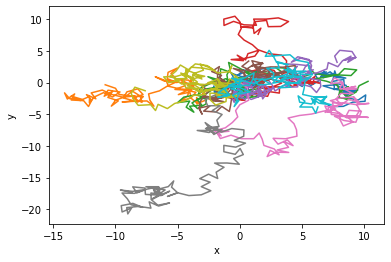

In [6]:
plt.plot(x, y, "-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

5. (3 points) Use the outcome of the function to visualize the distance from home for each of the agets over time. The x-axis should be labeled "Time" and the y-axis should be labeld "Distance from home." Ideally each of the different trajectories start at 0.0 and move around, each with a different color.

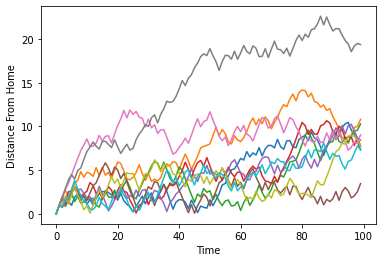

In [7]:
plt.plot(dist)
plt.xlabel("Time")
plt.ylabel("Distance From Home")
plt.show()

6. (3 points) Replicate the previous plot, this time making the individual trajectories some transparency (alpha=0.5) and adding one new black trajectory that represents the average of all the different agents over time. 

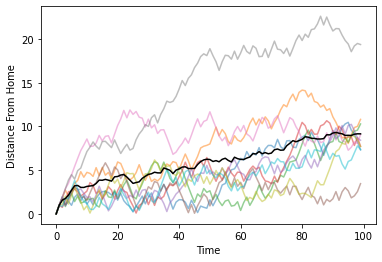

In [26]:
plt.plot(dist, alpha=0.5)
plt.plot(np.mean(dist, axis = 1), color = "black")
plt.xlabel("Time")
plt.ylabel("Distance From Home")
plt.show()

7. (3 points) Replicate the previous plot, this time re-run the simulation for dur=1000 and n=100. 

In [9]:
x2, y2, dist2 = run(1000, 100)

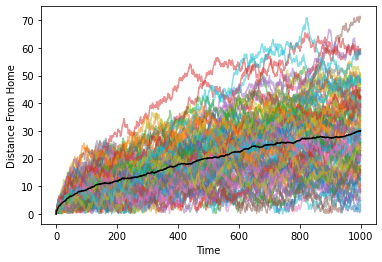

In [10]:
plt.plot(dist2, alpha=0.5)
plt.plot(np.mean(dist2,  axis = 1), color = "black")
plt.xlabel("Time")
plt.ylabel("Distance From Home")
plt.show()

8. (3 points) Instead of showing only the mean, show the mean and the standard deviation over time.

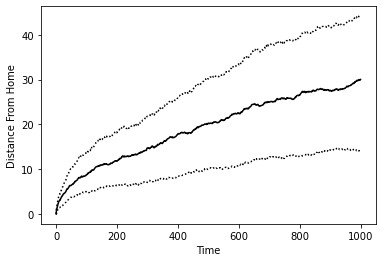

In [11]:
plt.plot(np.mean(dist2,  axis = 1), color = "black")
plt.plot(np.std(dist2, axis = 1), ":", color = "black")
plt.plot(np.std(dist2, axis = 1)+np.mean(dist2,  axis = 1), ":", color = "black")
plt.xlabel("Time")
plt.ylabel("Distance From Home")
plt.show()

9. (3 points) Show the distribution of final distances from home. 

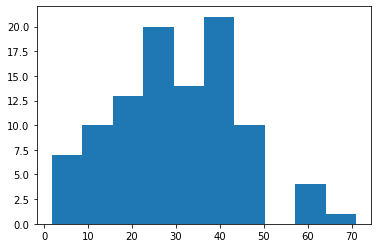

In [12]:
plt.hist(dist2[len(dist2)-1], bins=10)
plt.show()

10. (3 points) Advanced. Change your randomwalker class (copy and paste it in the next cell, and then modify it) so that instead of turning completely at random, the random walker's new orientation is the old orientation with some Normal noise added to it. The random value should be generated using a Normal distribution with a mean of 0.0 and a standard deviation given by the "alcohol" level of the individual, anywhere between 0.0 (which should lead to a straight path), all the way to about 3.14 (which should lead to a pure random walker as before). Hint: np.random.normal(0.0,self.alcohol).

In [13]:
import math
import random

class randomWalker():
    
    def __init__(self):
        ### your code here
        self.x = 0
        self.y = 0
        self.orientation = 0
        self.velocity = 1
        self.alcohol = 0
    
    def step(self):
        ### your code here
        self.orientation += np.random.normal(0.0,self.alcohol)
        self.x = self.x + self.velocity * math.cos(self.orientation)
        self.y = self.y + self.velocity * math.sin(self.orientation)
        # print("The current position is: (" + str(self.x) + ", " + str(self.y) + ") Orientation: " + str(self.orientation))
        
    def distanceFromHome(self):
        ### your code here
        return math.sqrt(((0-self.x)**2)+((0-self.y)**2))

11. (3 points) Re-define the run function (again copy and paste) so that in addition to receiving the duration and the number of agents/repetitions, it also now receives the degree of alcohol in the agents.

In [14]:
def run2(dur, n, alc):
    xPos = np.zeros((dur, n))
    yPos = np.zeros((dur, n))
    dist = np.zeros((dur, n))
    
    for i in range(n):
        walker = randomWalker()
        walker.alcohol = alc
        for j in range(dur):
            dist[j, i] = walker.distanceFromHome()
            xPos[j, i] = walker.x
            yPos[j, i] = walker.y
            walker.step()
            
            
    return [xPos, yPos, dist]

12. (3 points) Now answer the following question: Does the amount of alcohol in the agent's system affect how far it ends up after a fixed amount of time? If so, how does the velocity of traveling affect the average final distance of the agent? To demonstrate your answer, show a plot that has the different amount of alcohol on the x-axis (from 0.0 to 3.14) and the final average distance from home on the y-axis. Use a duration of 100 and an n of 100. Use linspace to create X levels of alcohol experiments.  

In [15]:
averages = np.zeros(100)
alcoholRange = np.linspace(0, 3.14, 100)
for i in range(100):
    averages[i] = np.mean(run2(100, 100, alcoholRange[i])[2])

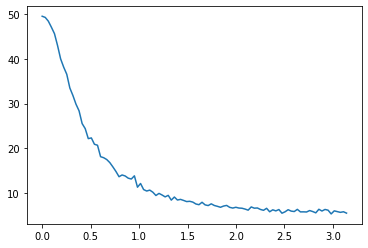

In [16]:
plt.plot(alcoholRange, averages)
plt.show()

13. Optional: How does the number of agents used in the experiment affect the results? Show visually.

14. Optional advanced: Come up with your question to ask of this model, and answer it.

### How hard was this assignment?

5-6  
I had to ask for help from other students here and there and this took awhile of really focused work and research